### Import important libraries for the project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

#### 1. Data Loading and Exploration:
 I began by loading the heart disease dataset and exploring its structure. This step is crucial as it helps us understand the data, identify missing values, and get a sense of the distributions and relationships between variables.


In [2]:
# Load the data
df = pd.read_csv('heart_disease.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
#get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [4]:
# describe the data
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


#### 2. Data Cleaning: 
I addressed missing values by filling categorical columns with the mode and numerical columns with the mean. We also removed any duplicate entries. Cleaning the data ensures that our analysis is accurate and reliable.

In [5]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Alcohol Consumption     2586
Diabetes                  30
Sugar Consumption         30
Cholesterol Level         30
Age                       29
Triglyceride Level        26
CRP Level                 26
High LDL Cholesterol      26
High Blood Pressure       26
Low HDL Cholesterol       25
Sleep Hours               25
Exercise Habits           25
Smoking                   25
Fasting Blood Sugar       22
BMI                       22
Stress Level              22
Family Heart Disease      21
Homocysteine Level        20
Blood Pressure            19
Gender                    19
Heart Disease Status       0
dtype: int64

<Axes: >

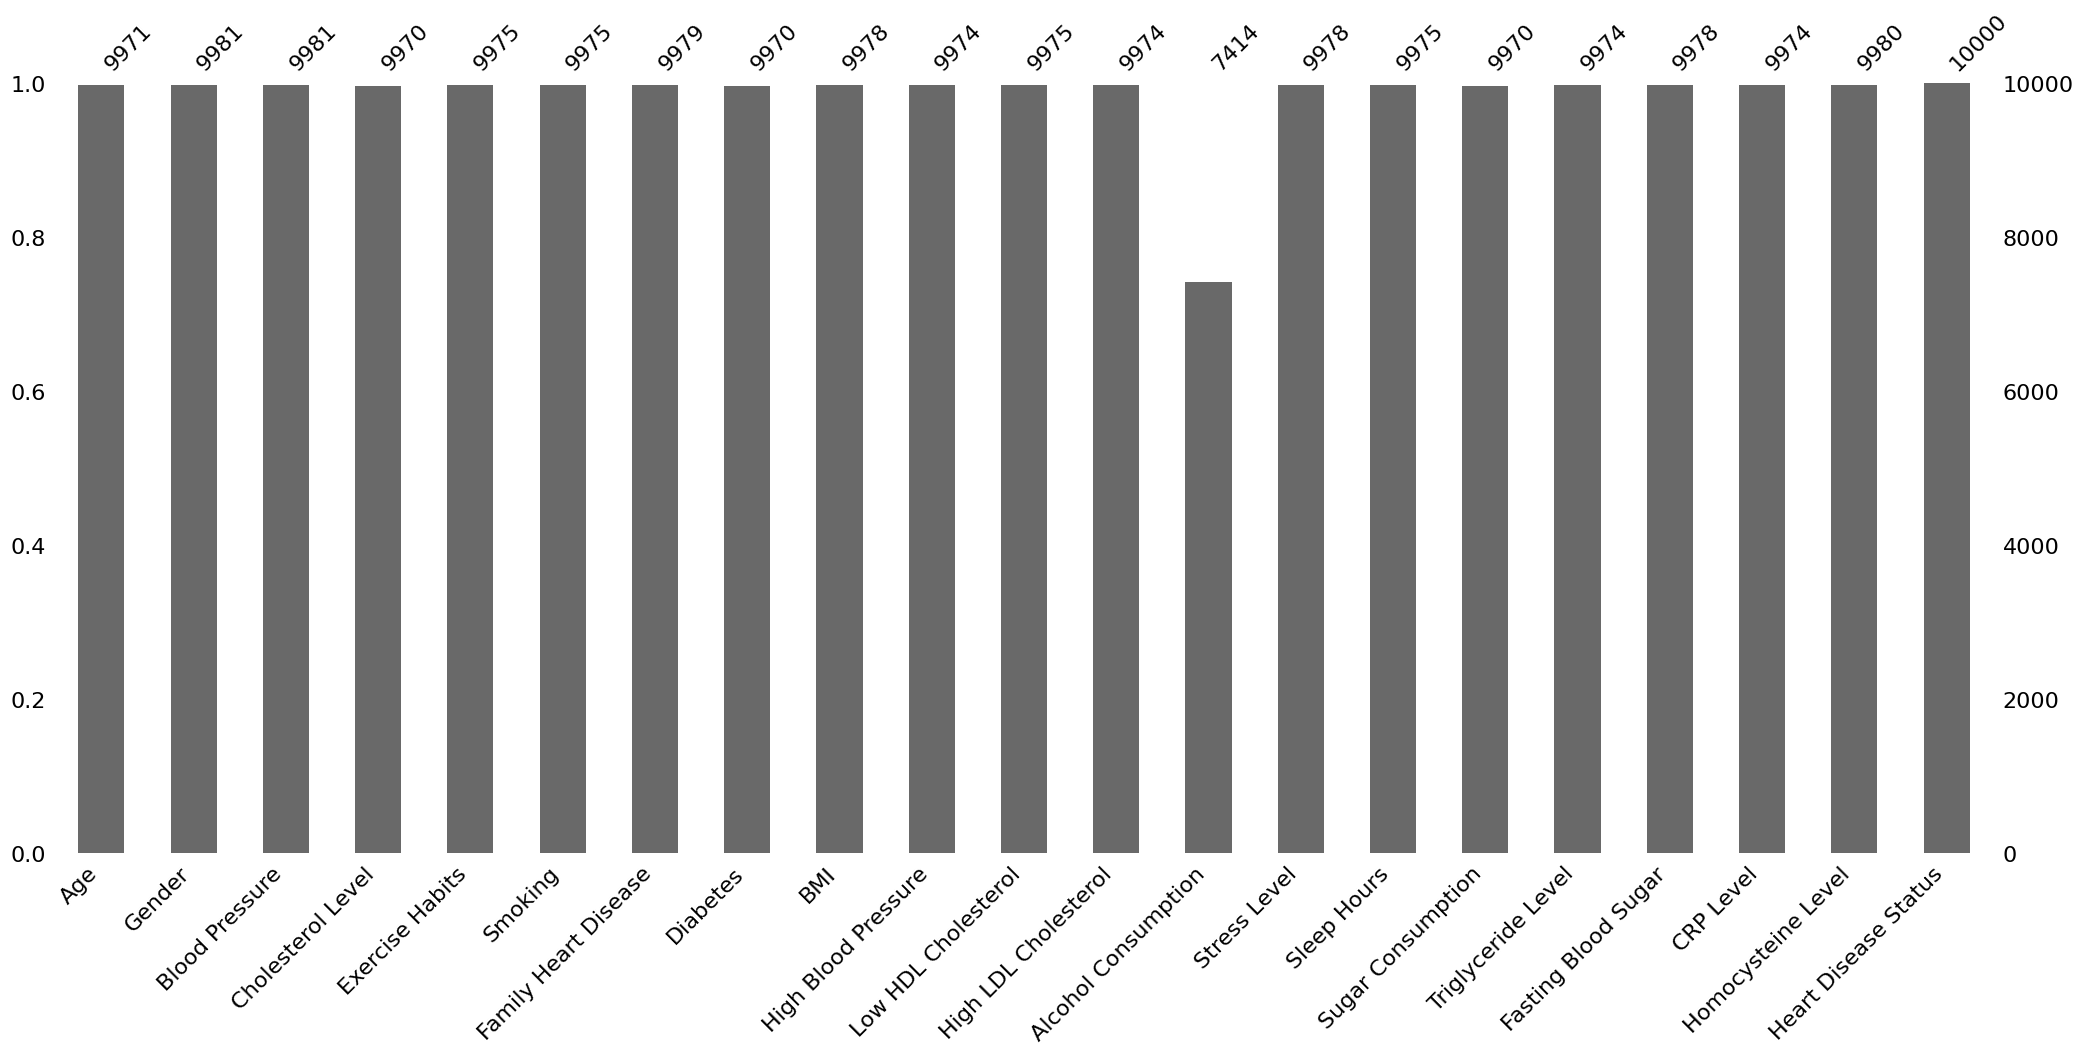

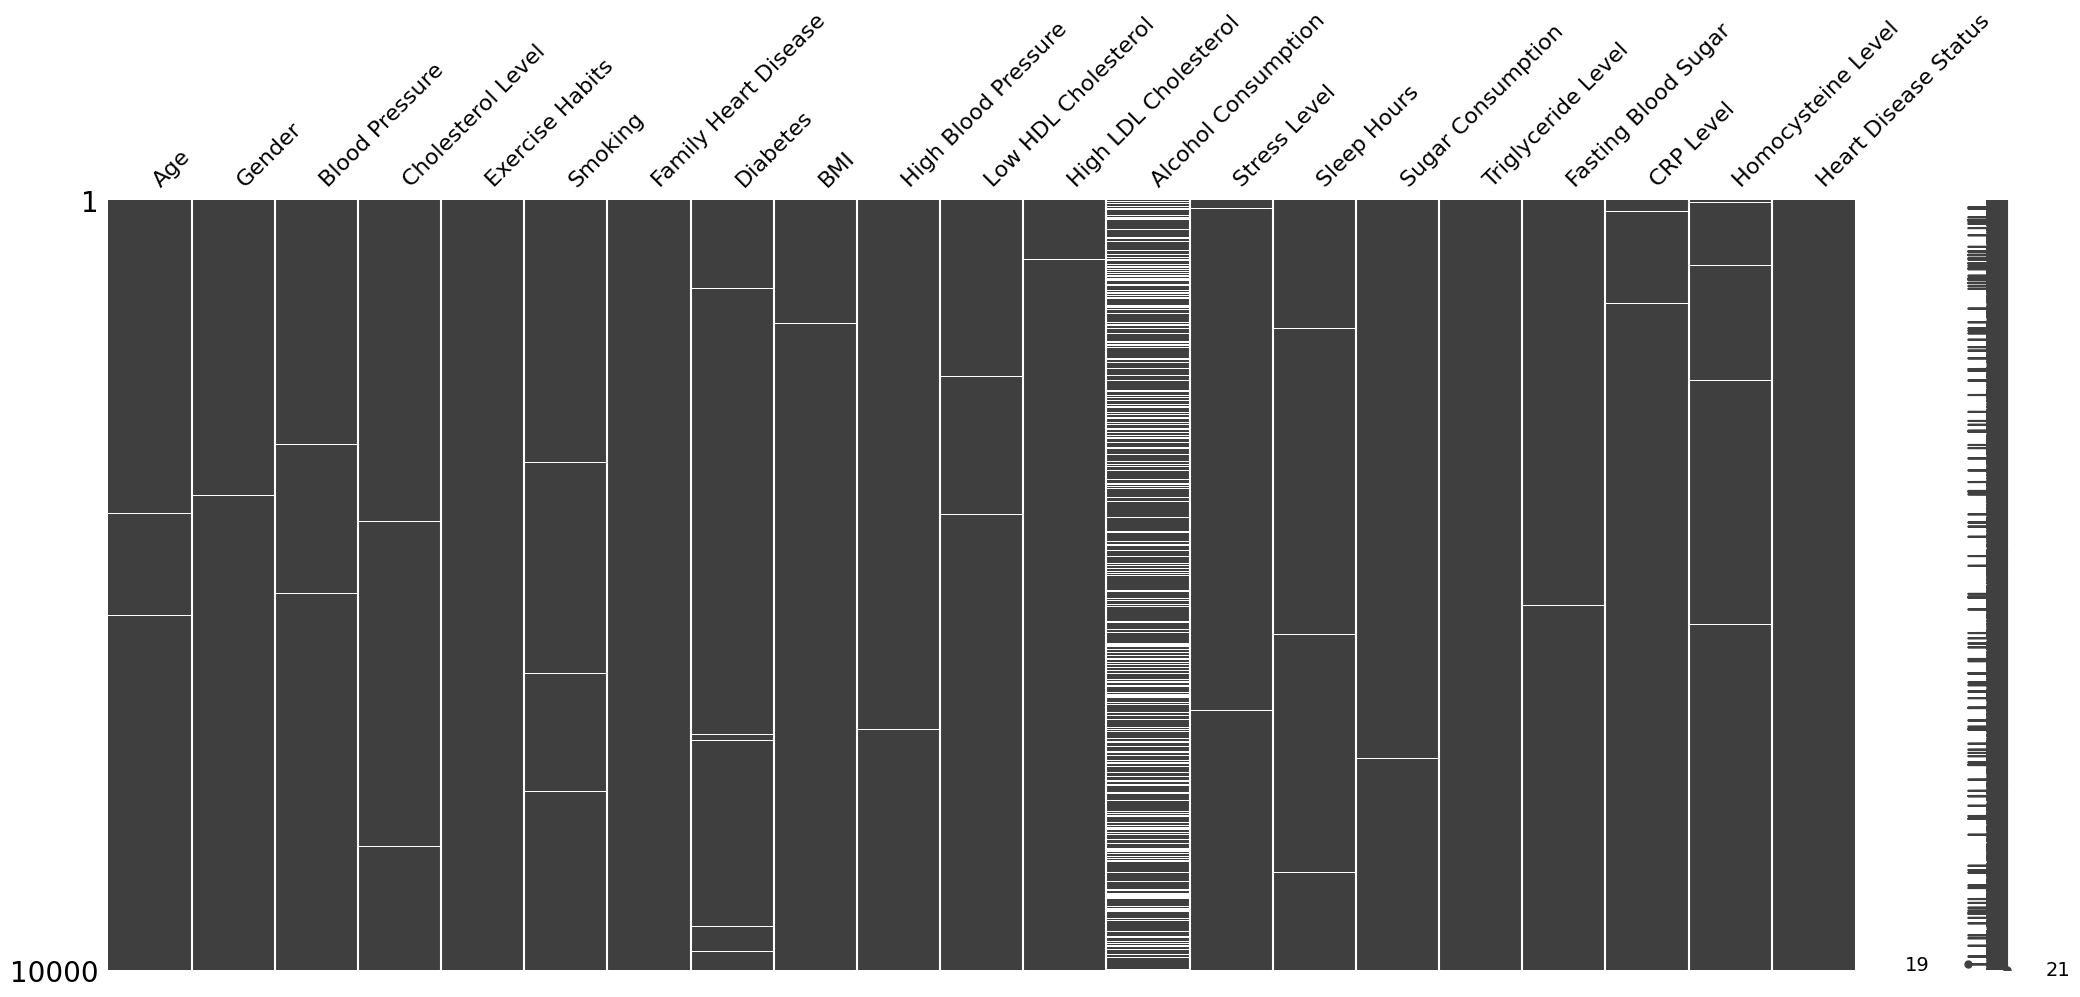

In [ ]:
# Visualize the missing values for each column.
msno.bar(df)
msno.matrix(df)


In [7]:
# Defining the Categorical columns and filling missing values with the mode generated.
Categorical_col = df.select_dtypes(include='object').columns
df[Categorical_col] = df[Categorical_col].fillna(df[Categorical_col].mode().iloc[0])


In [8]:
# Defining the Numerical columns and filling missing values with the mean generated.
Numerical_col = df.select_dtypes(include=['int64','float64']).columns
df[Numerical_col]=df[Numerical_col].fillna(df[Numerical_col].mean())

In [9]:
# Confirming if the missing values were filled.
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head()

Age                  0
Gender               0
Blood Pressure       0
Cholesterol Level    0
Exercise Habits      0
dtype: int64

In [ ]:
# Check for duplicated_values
duplicated_values = df.duplicated().sum()
duplicated_values

np.int64(0)

In [11]:
# Remove whitespaces from string columns
df[Categorical_col] = df[Categorical_col].apply(lambda x: x.str.strip())
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No


#### 3. Data Visualization: 
Using libraries like Seaborn and Matplotlib, i visualized the distribution of numerical and categorical variables. Visualizations help in identifying patterns, trends, and outliers, making it easier to draw insights from the data.

***Distribution of Numerical Variables***

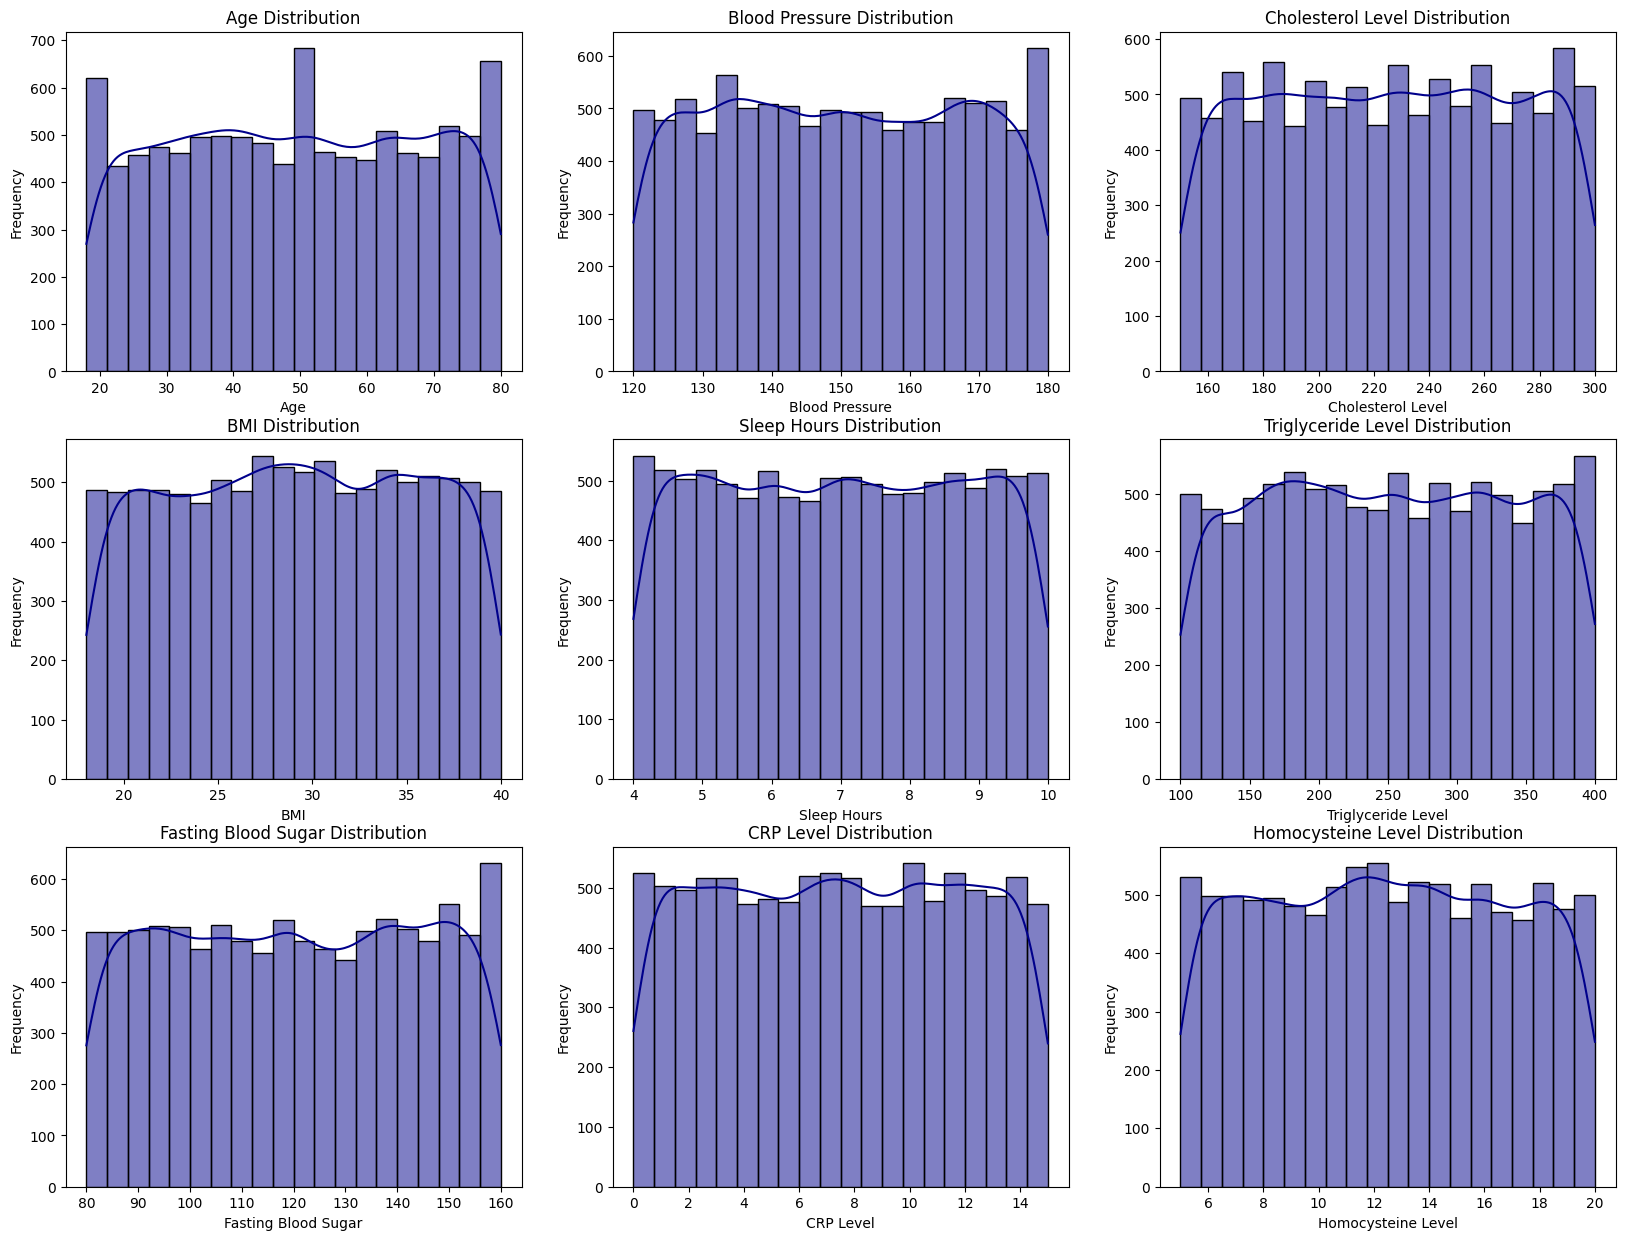

In [12]:

plt.figure(figsize=(20,15))
for i, col in enumerate(Numerical_col, 1):
    plt.subplot(3 ,3, i)
    sns.histplot(df[col], kde=True, color='darkblue', bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout
plt.show()

***Distribution of Categorical Variables***

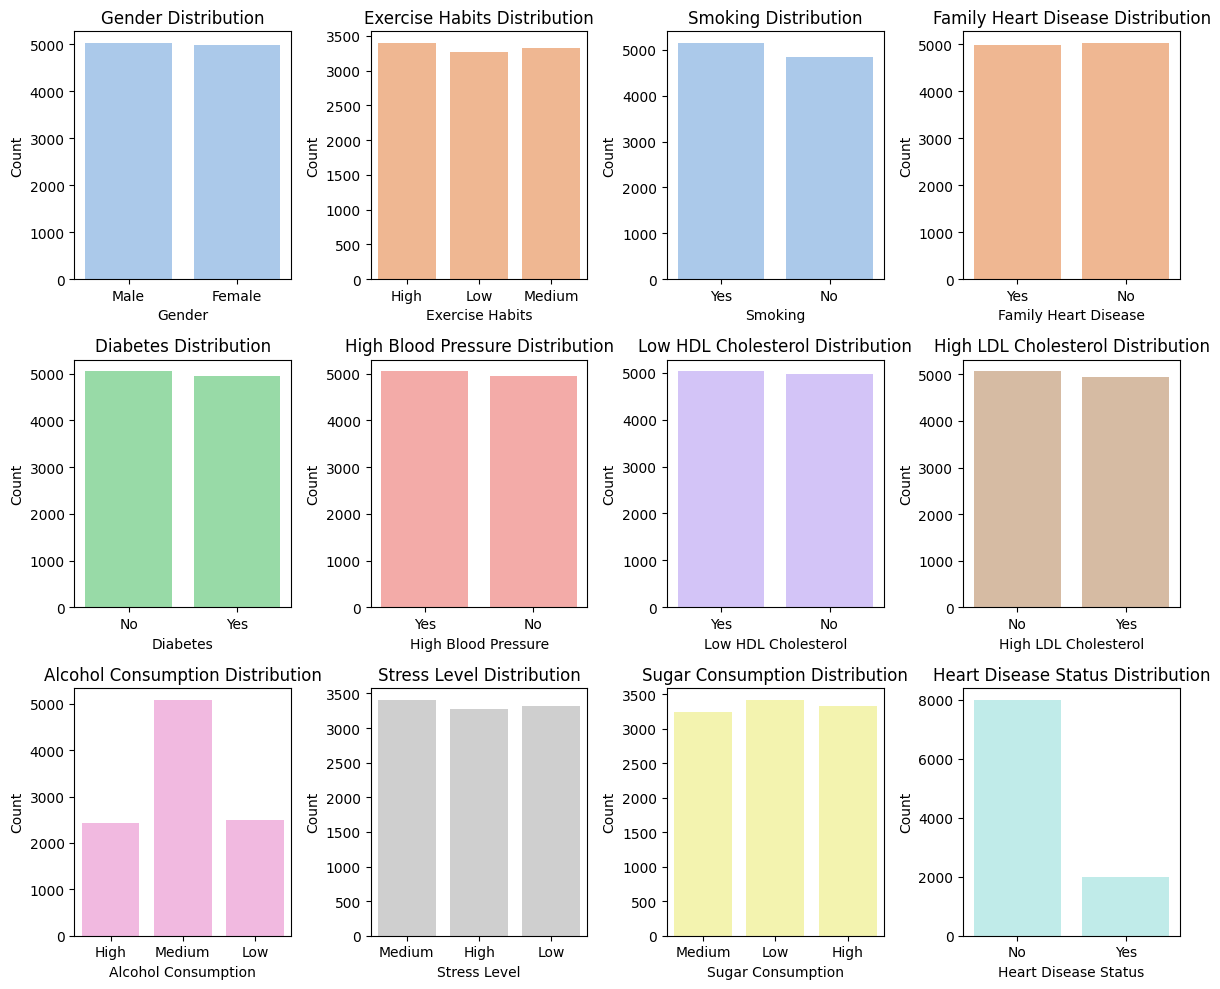

In [13]:
colors = sns.color_palette("pastel", len(Categorical_col))

plt.figure(figsize=(12, 10))
for i, col in enumerate(Categorical_col, 1):
    plt.subplot(3, 4, i) 
    sns.countplot(x=col, data=df, palette=[colors[i-3]]) 
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

***Relationship between Exercise Habits and Alcohol Consumption***

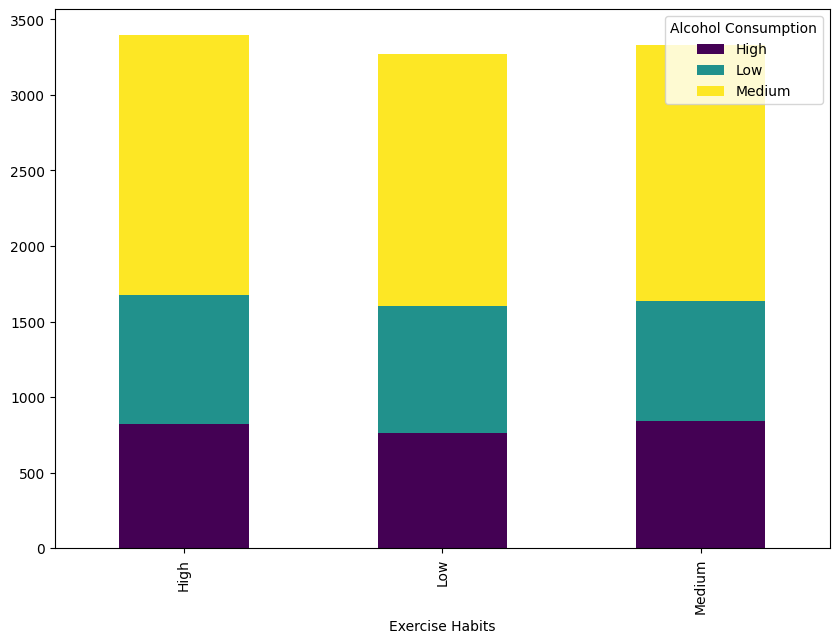

In [14]:
# Visualize the Relationship between Exercise Habits and Alcohol Consumption 

# Create a crosstab of Exercise Habits and Alcohol Consumption
exercise_vs_alcohol = pd.crosstab(df['Exercise Habits'], df['Alcohol Consumption'])

# Plot the crosstab as a stacked bar chart
exercise_vs_alcohol.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.show()

## Machine Learning



#### 4. Data Splitting and Scaling/Feature Engineering:
 I split the data into training and testing sets and standardized the features. Scaling ensures that all features contribute equally to the model, improving its performance. Then dummy variables were created for categorical columns to prepare the data for machine learning models. This step is essential for converting categorical data into a numerical format that models can understand.

In [15]:
# Prepare the data for training
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status'].apply(lambda x : 1 if x =='Yes' else 0)

# Create dummy variables for the categorical columns in the DataFrame.
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### 5. Model Training/Model Evaluation:
I trained multiple models, including Logistic Regression, Random Forest, Decision Tree, XGBoost, and K-Nearest Neighbors. Training different models allows us to compare their performance and choose the best one.
I also evaluated the models using metrics like accuracy, mean squared error, r2-score, and classification reports. Evaluating models helps us understand their strengths and weaknesses and select the most accurate and reliable one.

In [16]:
# Train a logistic regression model
Logr_model = LogisticRegression(max_iter=10000)
Logr_model.fit(X_train_scaled, y_train)

# Predict the target values for the test_set
y_pred_Logr = Logr_model.predict(X_test_scaled)

# Evaluate the model
Logr_accuracy = accuracy_score(y_test, y_pred_Logr)
mse = mean_squared_error(y_test, y_pred_Logr)
r2 = r2_score(y_test, y_pred_Logr)
classreport = classification_report(y_test, y_pred_Logr)
confusMatx = confusion_matrix(y_test, y_pred_Logr)

print(f'Accuracy: {Logr_accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'r2-score: {r2:.2f}')
print(f'Classification Report:\n {classreport}')
print(f'Confusion Matrix:\n {confusMatx}')

Accuracy: 0.81
Mean Squared Error: 0.19
r2-score: -0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

Confusion Matrix:
 [[1613    0]
 [ 387    0]]


In [17]:
# Train a RandomForestClassifier Model
RanForClas_model = RandomForestClassifier() 
RanForClas_model.fit(X_train_scaled, y_train)

# Predict the target values for the test_set
y_pred_Ran = RanForClas_model.predict(X_test_scaled)

# Evaluate the model
RanForClas_accuracy = accuracy_score(y_test, y_pred_Ran)
mse = mean_squared_error(y_test, y_pred_Ran)
r2 = r2_score(y_test, y_pred_Ran)
classreport = classification_report(y_test, y_pred_Ran)
confusMatx = confusion_matrix(y_test, y_pred_Ran)

print(f'Accuracy: {RanForClas_accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'r2-score: {r2:.2f}')
print(f'Classification Report:\n {classreport}')
print(f'Confusion Matrix:\n {confusMatx}')

Accuracy: 0.81
Mean Squared Error: 0.19
r2-score: -0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

Confusion Matrix:
 [[1613    0]
 [ 387    0]]


In [18]:
# Train a DecisionTreeClassifier Model
DecTreClas_model = DecisionTreeClassifier()
DecTreClas_model.fit(X_train_scaled, y_train)

# Predict the target values for the test_set
y_pred_Dec = DecTreClas_model.predict(X_test_scaled)

# Evaluate the model
DecTreClas_accuracy = accuracy_score(y_test, y_pred_Dec)
mse = mean_squared_error(y_test, y_pred_Dec)
r2 = r2_score(y_test, y_pred_Dec)
classreport = classification_report(y_test, y_pred_Dec)
confusMatx = confusion_matrix(y_test, y_pred_Dec)

print(f'Accuracy: {DecTreClas_accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'r2-score: {r2:.2f}')
print(f'Classification Report:\n {classreport}')
print(f'Confusion Matrix:\n {confusMatx}')

Accuracy: 0.67
Mean Squared Error: 0.33
r2-score: -1.12
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1613
           1       0.20      0.23      0.21       387

    accuracy                           0.67      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.69      0.67      0.68      2000

Confusion Matrix:
 [[1249  364]
 [ 298   89]]


In [19]:
# Train a XGBClassifier Model
XGB_model = DecisionTreeClassifier()
XGB_model.fit(X_train_scaled, y_train)

# Predict the target values for the test_set
y_pred_XGB = XGB_model.predict(X_test_scaled)

# Evaluate the model
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
mse = mean_squared_error(y_test, y_pred_XGB)
r2 = r2_score(y_test, y_pred_XGB)
classreport = classification_report(y_test, y_pred_XGB)
confusMatx = confusion_matrix(y_test, y_pred_XGB)

print(f'Accuracy: {XGB_accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'r2-score: {r2:.2f}')
print(f'Classification Report:\n {classreport}')
print(f'Confusion Matrix:\n {confusMatx}')

Accuracy: 0.66
Mean Squared Error: 0.34
r2-score: -1.15
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      1613
           1       0.20      0.25      0.22       387

    accuracy                           0.66      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.69      0.66      0.68      2000

Confusion Matrix:
 [[1233  380]
 [ 292   95]]


In [20]:
# Train a KNeighborsClassifier Model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_scaled, y_train)

# Predict the target values for the test_set
y_pred_KNN = KNN_model.predict(X_test_scaled)

# Evaluate the model
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
mse = mean_squared_error(y_test, y_pred_KNN)
r2 = r2_score(y_test, y_pred_KNN)
classreport = classification_report(y_test, y_pred_KNN)
confusMatx = confusion_matrix(y_test, y_pred_KNN)

print(f'Accuracy: {KNN_accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'r2-score: {r2:.2f}')
print(f'Classification Report:\n {classreport}')
print(f'Confusion Matrix:\n {confusMatx}')

Accuracy: 0.78
Mean Squared Error: 0.22
r2-score: -0.44
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1613
           1       0.22      0.06      0.10       387

    accuracy                           0.78      2000
   macro avg       0.51      0.50      0.48      2000
weighted avg       0.69      0.78      0.72      2000

Confusion Matrix:
 [[1527   86]
 [ 363   24]]


#### 6. Model Comparison: 
I compared the performance of all models to identify the best one. This step is crucial for ensuring that we deploy the most effective model for predicting heart disease.

***Different Model Comparison***

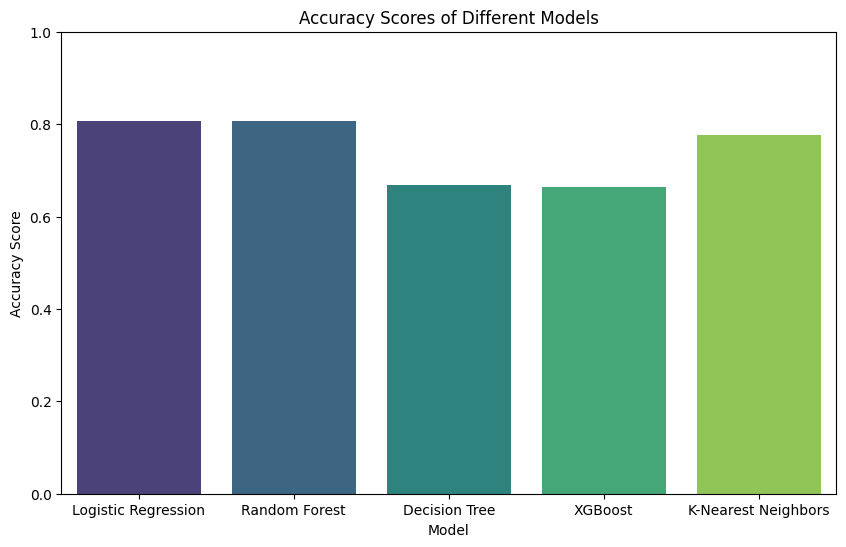

In [21]:
# Create a dictionary with model names and their corresponding accuracy scores
model_accuracies = {
    'Logistic Regression': Logr_accuracy,
    'Random Forest': RanForClas_accuracy,
    'Decision Tree': DecTreClas_accuracy,
    'XGBoost': XGB_accuracy,
    'K-Nearest Neighbors': KNN_accuracy
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

#### 7. Visualization of Results: 
I visualized the accuracy scores, classification report scores, and confusion matrices for all models. Visualizing results makes it easier to communicate findings and make data-driven decisions.

***Classification_Report***

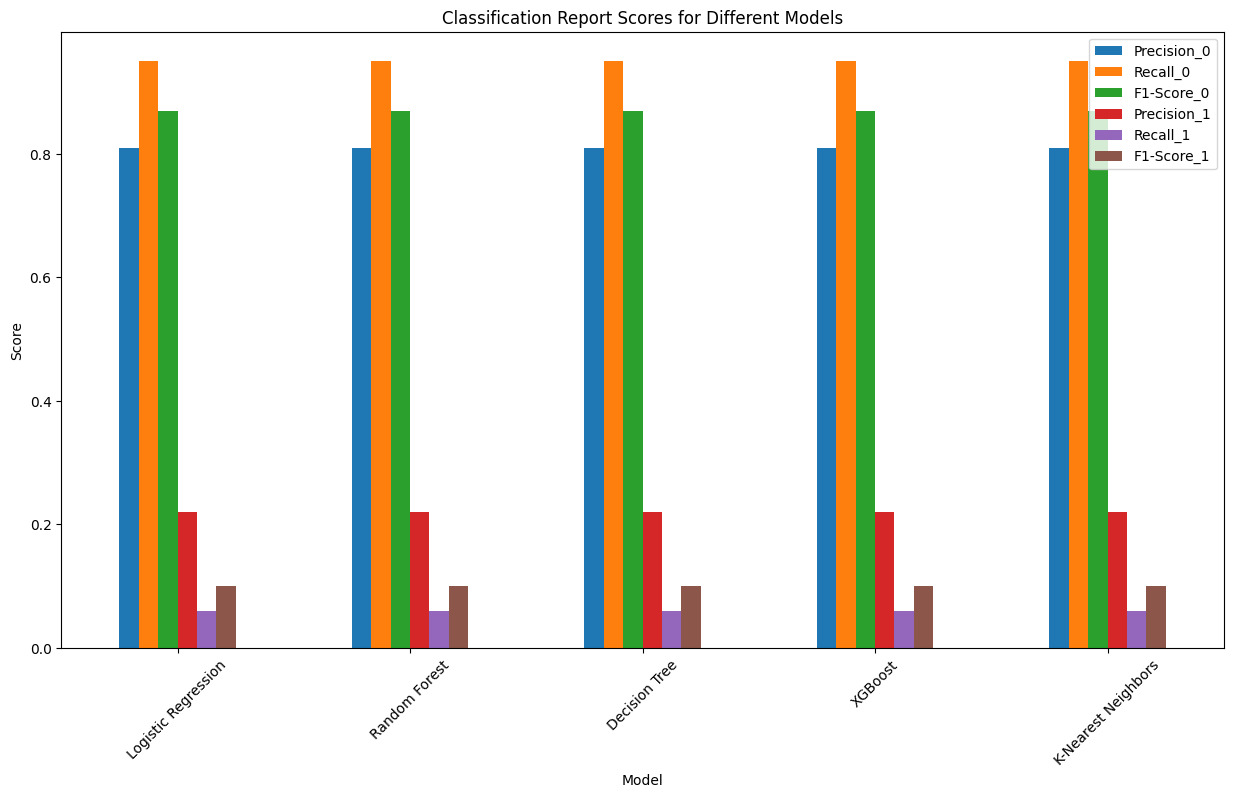

In [22]:
#Plotting a bar chart comparing different classification report score for different models.
import re

# Extract precision, recall, and f1-score for each model from the classification reports

def extract_scores(class_report):
    lines = class_report.split('\n')
    scores = {}
    for line in lines[2:4]:  # Only take the lines for class 0 and class 1
        parts = re.split(r'\s+', line.strip())
        scores[parts[0]] = {
            'precision': float(parts[1]),
            'recall': float(parts[2]),
            'f1-score': float(parts[3])
        }
    return scores

# Extract scores for each model
scores_Logr = extract_scores(classreport)
scores_Ran = extract_scores(classreport)
scores_Dec = extract_scores(classreport)
scores_XGB = extract_scores(classreport)
scores_KNN = extract_scores(classreport)

# Create a DataFrame for plotting
scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'K-Nearest Neighbors'],
    'Precision_0': [scores_Logr['0']['precision'], scores_Ran['0']['precision'], scores_Dec['0']['precision'], scores_XGB['0']['precision'], scores_KNN['0']['precision']],
    'Recall_0': [scores_Logr['0']['recall'], scores_Ran['0']['recall'], scores_Dec['0']['recall'], scores_XGB['0']['recall'], scores_KNN['0']['recall']],
    'F1-Score_0': [scores_Logr['0']['f1-score'], scores_Ran['0']['f1-score'], scores_Dec['0']['f1-score'], scores_XGB['0']['f1-score'], scores_KNN['0']['f1-score']],
    'Precision_1': [scores_Logr['1']['precision'], scores_Ran['1']['precision'], scores_Dec['1']['precision'], scores_XGB['1']['precision'], scores_KNN['1']['precision']],
    'Recall_1': [scores_Logr['1']['recall'], scores_Ran['1']['recall'], scores_Dec['1']['recall'], scores_XGB['1']['recall'], scores_KNN['1']['recall']],
    'F1-Score_1': [scores_Logr['1']['f1-score'], scores_Ran['1']['f1-score'], scores_Dec['1']['f1-score'], scores_XGB['1']['f1-score'], scores_KNN['1']['f1-score']]
})

# Plot the scores
scores_df.set_index('Model').plot(kind='bar', figsize=(15, 8))
plt.title('Classification Report Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

***Confusion Matrix***

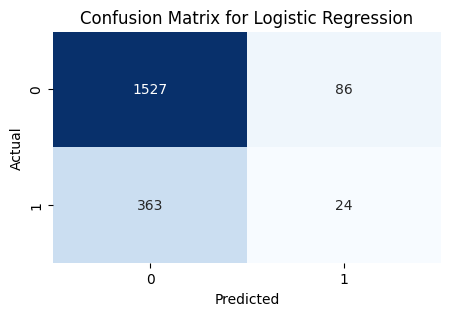

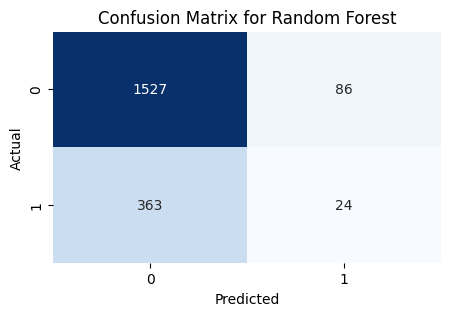

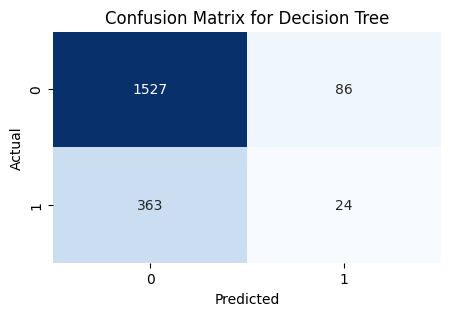

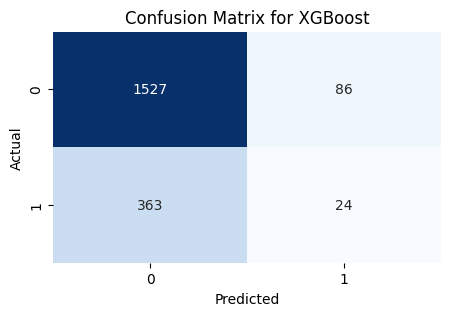

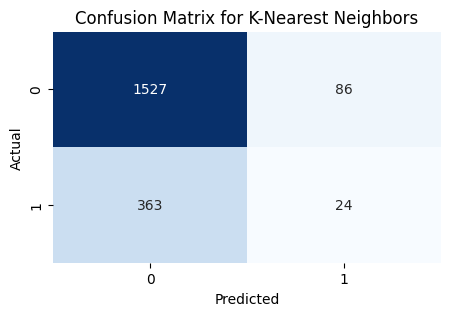

In [23]:
#create a heatmap of the confusion matrix of different models.
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(5,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(confusMatx, 'Logistic Regression')
plot_confusion_matrix(confusMatx, 'Random Forest')
plot_confusion_matrix(confusMatx, 'Decision Tree')
plot_confusion_matrix(confusMatx, 'XGBoost')
plot_confusion_matrix(confusMatx, 'K-Nearest Neighbors')

***scatterplot showing relation between R2 score and MSE of different models***

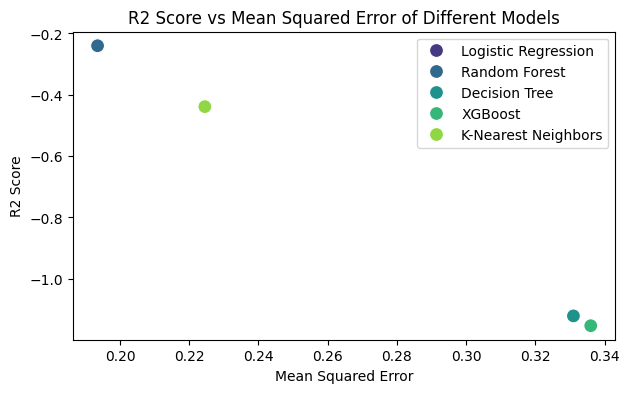

In [24]:
# create a scatterplot showing relation between R2 score and MSE of different models.
# Create a dictionary with model names, r2 scores, and mean squared errors
model_scores = {
    'Logistic Regression': {'r2': r2_score(y_test, y_pred_Logr), 'mse': mean_squared_error(y_test, y_pred_Logr)},
    'Random Forest': {'r2': r2_score(y_test, y_pred_Ran), 'mse': mean_squared_error(y_test, y_pred_Ran)},
    'Decision Tree': {'r2': r2_score(y_test, y_pred_Dec), 'mse': mean_squared_error(y_test, y_pred_Dec)},
    'XGBoost': {'r2': r2_score(y_test, y_pred_XGB), 'mse': mean_squared_error(y_test, y_pred_XGB)},
    'K-Nearest Neighbors': {'r2': r2_score(y_test, y_pred_KNN), 'mse': mean_squared_error(y_test, y_pred_KNN)}
}

# Convert the dictionary to a pandas DataFrame
scores_df = pd.DataFrame(model_scores).T.reset_index().rename(columns={'index': 'Model'})

# Plot the graph
plt.figure(figsize=(7, 4))
sns.scatterplot(data=scores_df, x='mse', y='r2', hue='Model', s=100, palette='viridis')
plt.title('R2 Score vs Mean Squared Error of Different Models')
plt.xlabel('Mean Squared Error')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.show()

This project highlights the importance of a structured approach to data analysis and machine learning. By following these steps, data analysts can ensure that their models are accurate, reliable, and provide valuable insights. The use of visualization and evaluation metrics helps in making informed decisions and communicating results effectively.
Thank you for your time.